### This project aims to predict student's O level results based on certain baseline characteristics

### Description of attributes in the table:

|Attribute | Description |
| --- | --- |
student_id | Unique ID for each student
number_of_siblings | Number of siblings
direct_admission |Mode of entering the school
CCA |Enrolled CCA
learning_style |Primary learning style
tuition |Indication of whether the student has a tuition
final_test |Student’s O-level mathematics examination score
n_male |Number of male classmates
n_female| Number of female classmates
gender |Gender type
age |Age of the student
hours_per_week |Number of hours student studies per week
attendance_rate |Attendance rate of the student (%)
sleep_time |Daily sleeping time (hour:minutes)
wake_time |Daily waking up time (hour:minutes)
mode_of_transport |Mode of transport to school
bag_color |Colour of student’s bag

I postulate that the following variables will have a positive correlation with the O level math test scores:
1. Duration of sleep
2. Number of hours student studies per week
3. Attendance rate of the student
4. If the student has tuition
5. Male gender

I postulate that the following variables will have a negative correlation with the O level math test scores:
1. If the student is from a sports CCA
2. If the patient is from a direct_admission (i.e. not by grades but by other skills like sports)
3. Number of siblings
4. Number of classmates of the opposite gender

I postulate that the following variables will have no impact on O level math test scores:
1. Student's bag colour
2. Learning style
3. Mode of transport to school

In [445]:
#Access database

import sqlite3, pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#from Ipython.display import display

db_file = r"data\score.db"
conn = None
try:
    conn = sqlite3.connect(db_file)
except sqlite3.Error as e:
    print(e)

In [446]:
#Find the Table Names in the database
query = '''
    SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
    '''
tables = pd.read_sql_query(query, conn)
tables

,name
0,score


In [447]:
#Load the score table into a DataFrame

query = '''
    SELECT * FROM score
    '''
df = pd.read_sql_query(query, conn)

In [448]:
df.shape

(15900, 18)

There are 18 observations and 18 variables in the score table

In [449]:
#Explore the score table
df.head()

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
2,2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
3,3,1,No,Clubs,Auditory,FEVM1T,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,public transport,yellow
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow


Noted that there is an index column, without which, there are 16 independent variables and 1 dependent variable (final_test)

Let's drop the index column

In [450]:
df.drop(columns = 'index', inplace = True)

In [451]:
#Explore the score table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15900 entries, 0 to 15899
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   number_of_siblings  15900 non-null  int64  
 1   direct_admission    15900 non-null  object 
 2   CCA                 15900 non-null  object 
 3   learning_style      15900 non-null  object 
 4   student_id          15900 non-null  object 
 5   gender              15900 non-null  object 
 6   tuition             15900 non-null  object 
 7   final_test          15405 non-null  float64
 8   n_male              15900 non-null  float64
 9   n_female            15900 non-null  float64
 10  age                 15900 non-null  float64
 11  hours_per_week      15900 non-null  float64
 12  attendance_rate     15122 non-null  float64
 13  sleep_time          15900 non-null  object 
 14  wake_time           15900 non-null  object 
 15  mode_of_transport   15900 non-null  object 
 16  bag_

"number of siblings" is the only integer variable among the numerical variables
And there a few columns with null values

In [452]:
#Explore the score table
df.describe()

,number_of_siblings,final_test,n_male,n_female,age,hours_per_week,attendance_rate
count,15900.000000,15405.000000,15900.000000,15900.000000,15900.000000,15900.000000,15122.000000
mean,0.886541,67.165401,13.880000,8.906038,15.213459,10.312579,93.270268
std,0.751346,13.977879,6.552584,6.663852,1.758941,4.461861,7.984230
min,0.000000,32.000000,0.000000,0.000000,-5.000000,0.000000,40.000000
25%,0.000000,56.000000,10.000000,4.000000,15.000000,7.000000,92.000000
50%,1.000000,68.000000,14.000000,8.000000,15.000000,9.000000,95.000000
75%,1.000000,78.000000,18.000000,13.000000,16.000000,14.000000,97.000000
max,2.000000,100.000000,31.000000,31.000000,16.000000,20.000000,100.000000


Of which 7 (not counting the index column) are quantitative variables

And looks like we have some outliers in the age column where the minimum cannot be negative, that's something to look out for

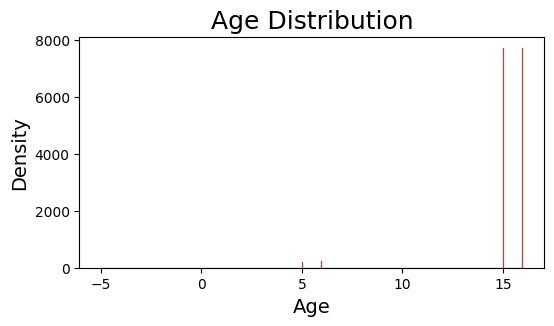

In [453]:

plt.figure(figsize=(6,3))
sns.histplot(df.age,color='r')
plt.title('Age Distribution',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Density',size=14)
plt.show()

Looks like most of the students are 15 and 16 years old. Let's see how many of them are not in this age range

In [454]:
from collections import Counter

count = Counter(df.age)
count

Counter({15.0: 7726, 16.0: 7723, 6.0: 230, 5.0: 216, -5.0: 4, -4.0: 1})

Looks like there are 2 groups of students, those 15-16yo and those 5-6yo. But since we are looking at O level math exam scores, it doesn't make sense for 5-6year olds to be taking these exams. It is more likely that these ages have been recorded wrongly with a missing 1 in front of them i.e. 5 year old should actually be 15 year old.

Hence, records with ages 5/6 will be amended to 15/16 respectively.

Records with Negative ages will be removed since they are insignficant (only 5 records out of 15.9k)

In [455]:
#Remove records with negative ages
df = df[df.age > 0]

In [456]:
#Amend records with ages 5/6
df.age = df.age.where(df.age > 6, other = df.age + 10)
count = Counter(df.age)
count

Counter({16.0: 7953, 15.0: 7942})

In [457]:
#Check for null values
df.isnull().sum()

number_of_siblings      0
direct_admission        0
CCA                     0
learning_style          0
student_id              0
gender                  0
tuition                 0
final_test            495
n_male                  0
n_female                0
age                     0
hours_per_week          0
attendance_rate       778
sleep_time              0
wake_time               0
mode_of_transport       0
bag_color               0
dtype: int64

Final_test and attendance_rate have null values, we will need to find a way to manage these null values

In [458]:
print('Ratio of null values in the final_test column: ', df['final_test'].isnull().sum()/df['final_test'].count())
print('Ratio of null values in the attendance_rate column: ', df['attendance_rate'].isnull().sum()/df['attendance_rate'].count())
print('Ratio of null values in any column: ', df.isnull().any(axis = 1).sum()/df.shape[0])

Ratio of null values in the final_test column:  0.03214285714285714
Ratio of null values in the attendance_rate column:  0.051465237811735134
Ratio of null values in any column:  0.07876690783265178


Since the number of rows with missing values < 10%, it is likely insignificant and i will be removing these rows

We will explore these after the main analysis

In [459]:
#Remove rows with null values
df = df[~df.isnull().any(axis = 1)]
df.isnull().sum() #check if it has been implemented correctly

number_of_siblings    0
direct_admission      0
CCA                   0
learning_style        0
student_id            0
gender                0
tuition               0
final_test            0
n_male                0
n_female              0
age                   0
hours_per_week        0
attendance_rate       0
sleep_time            0
wake_time             0
mode_of_transport     0
bag_color             0
dtype: int64

In [460]:
#Check for duplicates based on the student_id
df['student_id'].duplicated().sum()


763

Looks like there are some duplicates based on student ID (which are presumed to be unique to each student)

In [461]:
#check what the differences between the duplicate rows are
dup_ids = df['student_id'][df['student_id'].duplicated()]
df_dup = df[df['student_id'].isin(dup_ids)]
df_dup = df_dup.sort_values(by = 'student_id')
df_dup

,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
12290,0,No,Clubs,Auditory,00811H,Female,Yes,88.0,21.0,4.0,15.0,8.0,92.0,23:00,7:00,walk,white
5534,0,No,Clubs,Auditory,00811H,Female,Yes,88.0,21.0,4.0,15.0,8.0,92.0,23:00,7:00,walk,green
13541,1,No,Arts,Visual,0195IO,Female,No,52.0,8.0,22.0,16.0,15.0,99.0,22:00,6:00,private transport,yellow
12270,1,No,Arts,Visual,0195IO,Female,No,52.0,8.0,22.0,16.0,15.0,99.0,22:00,6:00,private transport,yellow
4303,0,No,Clubs,Auditory,02RSAH,Female,Yes,64.0,12.0,9.0,15.0,17.0,97.0,22:00,6:00,private transport,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7511,0,No,None,Auditory,ZUGVXE,Female,No,67.0,24.0,3.0,16.0,9.0,91.0,21:30,5:30,public transport,red
9953,1,No,Arts,Auditory,ZZICEC,Female,Yes,54.0,11.0,13.0,15.0,12.0,93.0,22:00,6:00,private transport,blue
4429,1,No,Arts,Auditory,ZZICEC,Female,Yes,54.0,11.0,13.0,15.0,12.0,93.0,22:00,6:00,private transport,green
1241,0,No,None,Visual,ZZNA57,Male,No,72.0,23.0,5.0,16.0,13.0,95.0,21:30,5:30,public transport,green


Looks like we have some duplicates where the student has 2 different bag colours.

As bag colour would unlikely affect the student's score, we will just keep the last record of each student ID (assuming the later records are the most up-to-date)

In [462]:
#Remove duplicate rows of student ID
dup_ids = df['student_id'][df['student_id'].duplicated(keep = 'last')]
df = df[~df['student_id'].isin(dup_ids)]
print(df['student_id'].duplicated().sum()) #check if it has been implemented correctly

#Remove the student_ID column as a predictor
df.drop(columns = ['student_id'], inplace = True)


0


Now let's calculate the duration of sleep from sleep time and wake time

In [463]:
df['sleep_time'] = pd.to_datetime(df['sleep_time'],format = '%H:%M')
df['wake_time'] = pd.to_datetime(df['wake_time'],format = '%H:%M')
dur_sleep = df['wake_time'] - df['sleep_time']

hours = dur_sleep.dt.components.hours
mins = dur_sleep.dt.components.minutes

df['dur_sleep'] = hours + mins/60
df['dur_sleep'].unique() #checking if the data looks right

df.drop(columns = ['sleep_time','wake_time'], inplace = True)


Now let's create a new column for number of classmates of the opposite gender

In [464]:
df['n_oppgender'] = np.where(df['gender'] == 'Female', df['n_male'], df['n_female'])
df.head()

,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,mode_of_transport,bag_color,dur_sleep,n_oppgender
0,0,Yes,Sports,Visual,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,private transport,yellow,8.0,14.0
1,2,No,Sports,Auditory,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,private transport,green,8.0,4.0
2,0,Yes,None,Visual,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,private transport,white,8.0,2.0
5,0,No,Arts,Visual,Female,No,57.0,9.0,12.0,15.0,11.0,96.0,private transport,red,8.0,9.0
6,2,Yes,None,Visual,Male,No,69.0,12.0,3.0,16.0,15.0,93.0,public transport,green,8.0,3.0


In [465]:
#Looks like the transcribing is correct, let's remove the n_male and n_female columns
df.drop(columns = ['n_male','n_female'], inplace = True)

Now we will explore the distribution of the dependent variable

<Figure size 600x300 with 0 Axes>

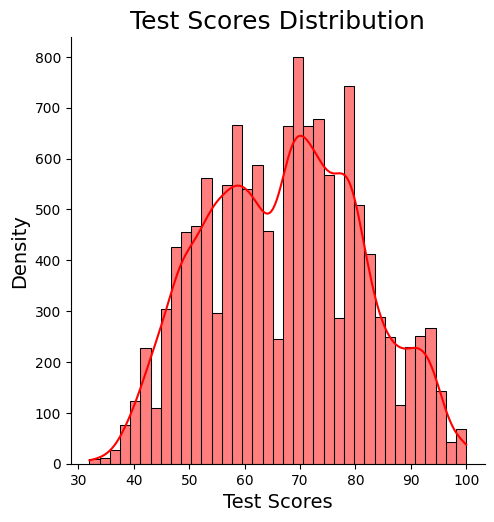

In [466]:
plt.figure(figsize=(6,3))
sns.displot(df.final_test,color='r', kde = True)
plt.title('Test Scores Distribution',size=18)
plt.xlabel('Test Scores',size=14)
plt.ylabel('Density',size=14)
plt.show()

Now we will explore pairplots of the numerical values

In [467]:
df.describe().columns

Index(['number_of_siblings', 'final_test', 'age', 'hours_per_week',
       'attendance_rate', 'dur_sleep', 'n_oppgender'],
      dtype='object')

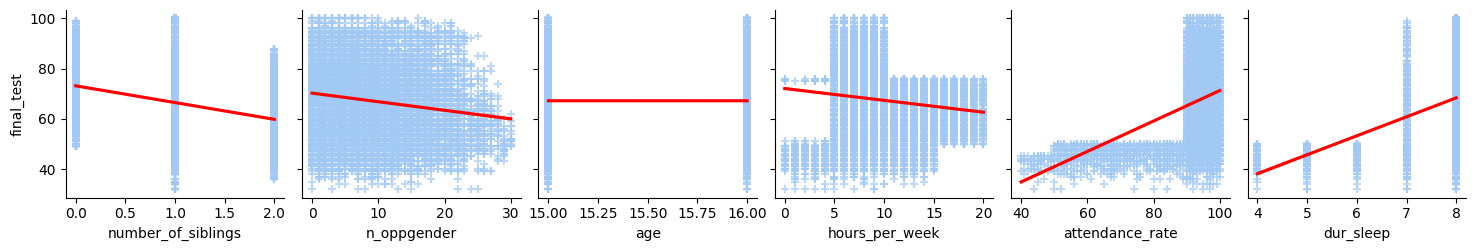

In [468]:
#less the index column
sns.set_palette("pastel")
sns.pairplot(df, 
                 y_vars = ['final_test'],
                 x_vars = ['number_of_siblings','n_oppgender','age', 'hours_per_week', 'attendance_rate','dur_sleep'],
                 markers="+",
                 diag_kind="kde",
                 kind='reg',
                 plot_kws={'line_kws':{'color':'red'}, 
                           'scatter_kws': {'alpha': 0.7}},
                );

At first impressions, it seems like there are relationships between final test scores with:
1. Number of siblings (inverse relationship)
2. Number of classmates of the opposite gender (inverse relationship)
3. Number of hours spent studying per week
4. The attendance rate
5. Duration of sleep

In [469]:
#Obtain the indexes of the numeric columns
x_vars = ['number_of_siblings','age', 'hours_per_week', 'attendance_rate','dur_sleep','n_oppgender']
numeric_columns = [i for i,x in enumerate(df.columns) if x in set(x_vars)]
numeric_columns

[0, 7, 8, 9, 12, 13]

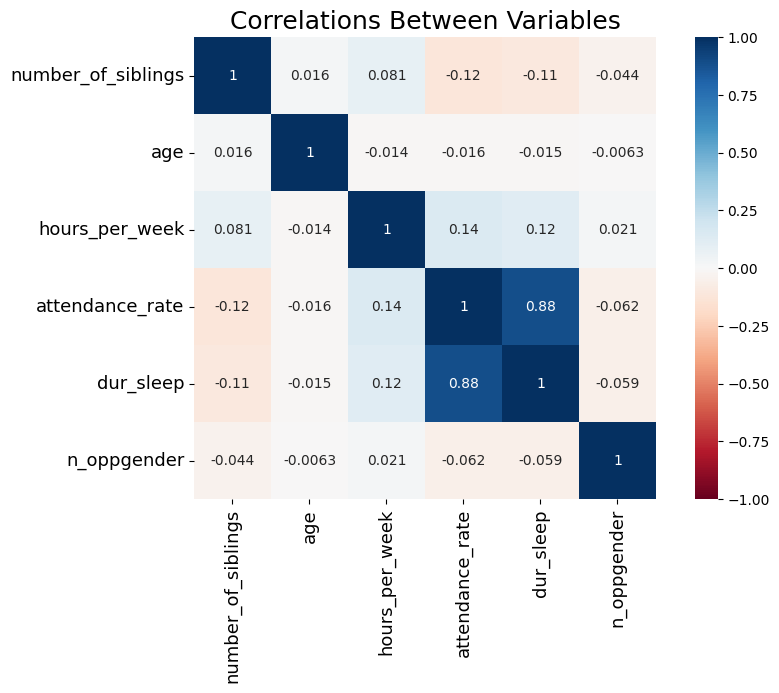

In [470]:
#Plot the correlation heatmap
plt.figure(figsize = (10,6))
sns.heatmap(df.iloc[:,numeric_columns].corr(),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title('Correlations Between Variables',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

Looks like there's high positive correlation between attendance rate and duration of sleep.

Let's drop duration of sleep and use attendance rate as a predictor.

In [471]:
df.drop(columns = ['dur_sleep'], inplace = True)

We will now clean the categorical variables

In [472]:
#The categorical variables are:
cat_cols = [x for x in set(df.columns) - set(df.describe().columns)]
cat_cols

['tuition',
 'learning_style',
 'bag_color',
 'mode_of_transport',
 'CCA',
 'direct_admission',
 'gender']

In [473]:
#And the unique variables are:
for c in df[cat_cols]:
    print(c,df[c].unique())

tuition ['No' 'Yes' 'Y' 'N']
learning_style ['Visual' 'Auditory']
bag_color ['yellow' 'green' 'white' 'red' 'blue' 'black']
mode_of_transport ['private transport' 'public transport' 'walk']
CCA ['Sports' 'None' 'Arts' 'ARTS' 'Clubs' 'SPORTS' 'CLUBS' 'NONE']
direct_admission ['Yes' 'No']
gender ['Female' 'Male']


In [474]:
#Standardise the Y to Yes and N to No for the tuition column
df['tuition'] = df['tuition'].replace(to_replace = {'Y':'Yes','N':"No"})

#Standardise the names of the CCA in the CCA column
df['CCA'] = df['CCA'].str.lower()

for c in df[cat_cols]:
    print(c,df[c].unique())


tuition ['No' 'Yes']
learning_style ['Visual' 'Auditory']
bag_color ['yellow' 'green' 'white' 'red' 'blue' 'black']
mode_of_transport ['private transport' 'public transport' 'walk']
CCA ['sports' 'none' 'arts' 'clubs']
direct_admission ['Yes' 'No']
gender ['Female' 'Male']


Looks like all categories are cleaned up, now to encode them. We will use one-hot encoding since there aren't too many categories per column, recognising that this might lead to multicollinearity. But the alternative of label encoding would be an issue since I'm planning to run a linear regression model. (ordinality is preserved even though there's no meaning to it). Binary encoding also adds an additional layer of complexity

In [475]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_data =  encoder.fit_transform(df[cat_cols])
df_cat_cols = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(cat_cols))

df.reset_index(drop = True, inplace = True)
df = pd.concat((df[df.columns[~df.columns.isin(cat_cols)]], df_cat_cols), axis = 1)


In [476]:
df.columns

Index(['number_of_siblings', 'final_test', 'age', 'hours_per_week',
       'attendance_rate', 'n_oppgender', 'tuition_No', 'tuition_Yes',
       'learning_style_Auditory', 'learning_style_Visual', 'bag_color_black',
       'bag_color_blue', 'bag_color_green', 'bag_color_red', 'bag_color_white',
       'bag_color_yellow', 'mode_of_transport_private transport',
       'mode_of_transport_public transport', 'mode_of_transport_walk',
       'CCA_arts', 'CCA_clubs', 'CCA_none', 'CCA_sports',
       'direct_admission_No', 'direct_admission_Yes', 'gender_Female',
       'gender_Male'],
      dtype='object')

We will drop one redundant column per category

In [477]:
df.drop(columns = ['tuition_No', 'learning_style_Auditory','bag_color_black','mode_of_transport_walk','CCA_none','direct_admission_No','gender_Female'], inplace = True)

In [478]:
df.head()

,number_of_siblings,final_test,age,hours_per_week,attendance_rate,n_oppgender,tuition_Yes,learning_style_Visual,bag_color_blue,bag_color_green,bag_color_red,bag_color_white,bag_color_yellow,mode_of_transport_private transport,mode_of_transport_public transport,CCA_arts,CCA_clubs,CCA_sports,direct_admission_Yes,gender_Male
0,0,69.0,16.0,10.0,91.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2,47.0,16.0,7.0,94.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,85.0,15.0,8.0,92.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0,57.0,15.0,11.0,96.0,9.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2,69.0,16.0,15.0,93.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


Now that the data is processed, we can start feeding the data into a few models and assess their performance

In [479]:
dependent_col = ['final_test']
independent_col = [x for x in set(df.columns) - set(dependent_col)]

In [480]:
# Settings Train / Test Split. 
from sklearn.model_selection import train_test_split

# Splitting into Training and Holdout Test Sets
# Ensure stratification for now. We will adjust the ratio only later if required.
X_train, X_test, y_train, y_test = train_test_split(df[independent_col], df[dependent_col],\
                                                    stratify=df[dependent_col], test_size=0.2, random_state=121)

In [481]:
import statsmodels.api as st
X1 = st.add_constant(X_train)
lin_model=st.OLS(y_train,X1)
result=lin_model.fit()
print(result.summary2())

                          Results: Ordinary least squares
Model:                     OLS                   Adj. R-squared:          0.466     
Dependent Variable:        final_test            AIC:                     78573.4894
Date:                      2024-04-22 23:00      BIC:                     78718.6587
No. Observations:          10493                 Log-Likelihood:          -39267.   
Df Model:                  19                    F-statistic:             482.0     
Df Residuals:              10473                 Prob (F-statistic):      0.00      
R-squared:                 0.467                 Scale:                   104.42    
------------------------------------------------------------------------------------
                                     Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------------------
const                               31.9881   3.3891   9.4386 0.0000 25.3449 38.6314
bag_col

The P-value for age, bag_color and mode of transport are more than 0.05, hence we will remove them and rerun the linear regression

In [482]:
df.drop(columns = ['age','bag_color_white','bag_color_green','bag_color_red','bag_color_blue','bag_color_yellow','mode_of_transport_public transport','mode_of_transport_private transport'], inplace = True)

In [483]:
dependent_col = ['final_test']
independent_col = [x for x in set(df.columns) - set(dependent_col)]

# Settings Train / Test Split. 
from sklearn.model_selection import train_test_split

# Splitting into Training and Holdout Test Sets
# Ensure stratification for now. We will adjust the ratio only later if required.
X_train, X_test, y_train, y_test = train_test_split(df[independent_col], df[dependent_col],\
                                                    stratify=df[dependent_col], test_size=0.2, random_state=121)

import statsmodels.api as st
X1 = st.add_constant(X_train)
lin_model=st.OLS(y_train,X1)
result=lin_model.fit()
print(result.summary2())

                   Results: Ordinary least squares
Model:               OLS               Adj. R-squared:      0.466     
Dependent Variable:  final_test        AIC:                 78563.4359
Date:                2024-04-22 23:00  BIC:                 78650.5375
No. Observations:    10493             Log-Likelihood:      -39270.   
Df Model:            11                F-statistic:         832.2     
Df Residuals:        10481             Prob (F-statistic):  0.00      
R-squared:           0.466             Scale:               104.40    
----------------------------------------------------------------------
                       Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------
const                 34.2548   1.2857  26.6426 0.0000 31.7346 36.7751
CCA_sports            -7.9724   0.2890 -27.5825 0.0000 -8.5389 -7.4058
gender_Male           -0.4328   0.2158  -2.0050 0.0450 -0.8558 -0.0097
learning_style_Visual  5.6

!!! Elaborate on the results...
Then just do another random forest model and we are done! https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [486]:
# From Standard Scaler for Numerical Columns (when necessary) Eg. Logistic Regression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_col = ['number_of_siblings','n_oppgender', 'hours_per_week', 'attendance_rate']

preprocessor = ColumnTransformer(\
    transformers=[('num', StandardScaler(), numeric_col)],\
    remainder='passthrough') # Pass through categorical features unchanged

X_train_transformed = preprocessor.fit_transform(X_train)
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=independent_col)
X_test_transformed = preprocessor.fit_transform(X_test)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=independent_col)
y_train_transformed = y_train.values.ravel()
y_test_transformed = y_test.values.ravel()

In [487]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [494]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Evaluate model on the test set
y_pred= model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Linear Regression R squared of the test set is: {:.2f}".format(r2_score(y_test, y_pred)))

print("Linear Regression MSE of the test set is: {:.2f}".format(mse))

lin_rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Linear Regression RMSE of the test set is: {:.2f}".format(lin_rmse))

print("Linear Regression MAE of the test set is: {:.2f}".format(mean_absolute_error(y_test, y_pred)))

Linear Regression R squared of the test set is: 0.46
Linear Regression MSE of the test set is: 105.37
Linear Regression RMSE of the test set is: 10.27
Linear Regression MAE of the test set is: 8.21


References:
1. https://www.sqlitetutorial.net/sqlite-python/sqlite-python-select/
2. https://medium.com/@ugursavci/complete-exploratory-data-analysis-using-python-9f685d67d1e4
3. https://medium.com/@dilip.voleti/multicollinearity-in-machine-learning-26d652b183de
4. https://medium.com/data-and-beyond/mastering-exploratory-data-analysis-eda-everything-you-need-to-know-7e3b48d63a95
5. https://medium.com/@redwaneaitouammi/11-predicting-house-prices-using-linear-regression-python-example-5697fff7f1a4
6. https://medium.com/@polanitzer/building-a-linear-regression-in-python-step-by-step-94caeb0a4f18
7. https://towardsdatascience.com/random-forest-in-python-24d0893d51c0